In [1]:
# python packages
# standard packages
import numpy as np # for arrays
import matplotlib.pyplot as plt # for plotting
import matplotlib as mpl # for matplotlib settings
import os # for directories
import scipy as sp # for numerical processes and optimizations
import re
import uuid
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  



import matplotlib.pyplot as plt
from scipy import stats

# for machine learning and stats
import statsmodels.api as sm # for statistical models and GLMs


import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [8]:
data = pd.read_csv(r"C:\Users\shree\Downloads\fairlabs_data.csv")

In [4]:
data.head(5)

,encounter_id,delivery_date,mother_id,maternal_age,maternal_race,uds_order_id,order_indication,uds_collection_date,detected_6-acetylmorphine,detected_7-aminoclonazepam,detected_alprazolam,detected_amobarbital,detected_amphetamine,detected_benzoylecgonine,detected_buprenorphine,detected_buprenorphine glucuronide,detected_bupropion,detected_clonidine,detected_cocaine,detected_codeine,detected_eddp,detected_fentanyl,detected_gabapentin,detected_hydrocodone,detected_hydromorphone,detected_hydroxybupropion,detected_ketamine,detected_lsd,detected_lorazepam,detected_lorazepam-glucuronide,detected_methadone,detected_methamphetamine,detected_methylbenzodioxolylbutanamine,detected_methylenedioxyamphetamine,detected_methylenedioxymethylamphetamine,detected_methylphenidate,detected_morphine,detected_morphine-3-glucuronide,detected_naloxone,detected_norbuprenorphine,detected_nordiazepam,detected_o-desmethyl tramadol,detected_oxazepam,detected_oxycodone,detected_oxymorphone,detected_pentobarbital,detected_phencyclidine,detected_phenobarbital,detected_quetiapine,detected_rohypnol,detected_tetrahydrocannabinol,detected_tramadol,detected_venlafaxine,detected_xylazine,cps_reporting_date
0,encounter_0,2028-09-06,mother_0,34,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,encounter_1,2027-09-28,mother_1,28,Black or African American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2027-09-29
2,encounter_1000,2028-04-10,mother_907,37,Black or African American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,encounter_10001,2028-12-08,mother_9007,32,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,encounter_10003,2028-09-04,mother_9009,22,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>
<body>
  <p style="font-size: 18px;">The data provides information each time a mother gives birth. Importantly, it includes:</p>
  <ul>
    <li style="font-size: 16px;">The delivery date</li>
    <li style="font-size: 16px;">The mother's race</li>
    <li style="font-size: 16px;">A UDS order ID (if applicable)</li>
    <li style="font-size: 16px;">The indication for the UDS order (if applicable)</li>
    <li style="font-size: 16px;">The results of the drug test</li>
    <li style="font-size: 16px;">The CPS reporting date if the mother was reported to CPS</li>
  </ul>
</body>
</html>


In [5]:
# Convert 'delivery_date' to datetime format
data['delivery_date'] = pd.to_datetime(data['delivery_date'])

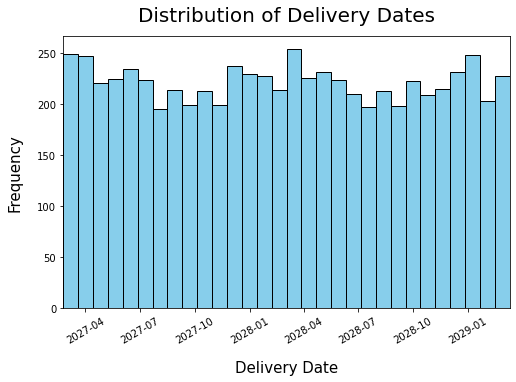

In [6]:
plt.figure(figsize=(8, 5))
plt.hist(data['delivery_date'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Delivery Dates', fontsize=20, pad=15)
plt.xlabel('Delivery Date', fontsize=15, labelpad=15)
plt.ylabel('Frequency', fontsize=15, labelpad=15)
plt.xticks(rotation=30)
plt.xlim(min(data['delivery_date']), max(data['delivery_date']))

plt.grid(False)
plt.show()


<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>
<body>
  <ul>
    <li style="font-size: 18px;">The distribution of delivery dates is approximately uniform</li>
      <li style="font-size: 18px;">A step taken to de-identify the dataset likely involved adding a constant term to all delivery dates (given they are in the future).</li>
  </ul>
</body>
</html>


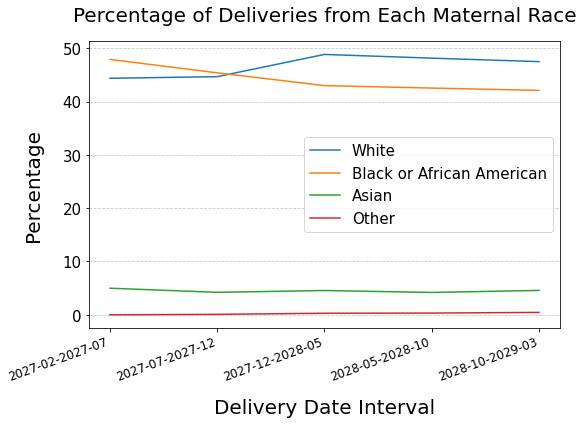

In [7]:
race_counts = data['maternal_race'].value_counts(normalize=True) * 100

filtered_race_counts = race_counts[race_counts >= 1]

other_category_value = race_counts[race_counts < 1].sum()

filtered_race_counts['Other'] = other_category_value

n_bins = 5
min_date = data['delivery_date'].min()
max_date = data['delivery_date'].max()
bin_edges = pd.date_range(start=min_date, end=max_date, periods=n_bins + 1)

race_time_bin_counts = data.groupby([pd.cut(data['delivery_date'], bins=bin_edges), 'maternal_race']).size().unstack(fill_value=0)

race_distribution_over_time = race_time_bin_counts.divide(race_time_bin_counts.sum(axis=1), axis=0) * 100

filtered_race_distribution_over_time = race_distribution_over_time[filtered_race_counts.index]

plt.figure(figsize=(8, 6))

time_bin_labels = [f'{start.strftime("%Y-%m")}-{end.strftime("%Y-%m")}' 
                   for start, end in zip(bin_edges[:-1], bin_edges[1:])]

for race in filtered_race_counts.index:
    plt.plot(time_bin_labels, filtered_race_distribution_over_time[race], label=race)

plt.title('Percentage of Deliveries from Each Maternal Race', fontsize=20, pad=20)
plt.xlabel('Delivery Date Interval', fontsize=20, labelpad=15)
plt.ylabel('Percentage', fontsize=20, labelpad=20)
plt.legend(title='', fontsize=15)
plt.xticks(rotation=20, ha='right', fontsize = 12)
plt.yticks(fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>
<body>
  <ul>
    <li style="font-size: 18px;">
In the dataset, the majority of mothers are either White or Black, each comprising roughly 40-50% of the total.</li>
    <li style="font-size: 18px;">
For the rest of this analysis, we will only make comparisons bewteen White and Black mothers</li>
  </ul>
</body>
</html>

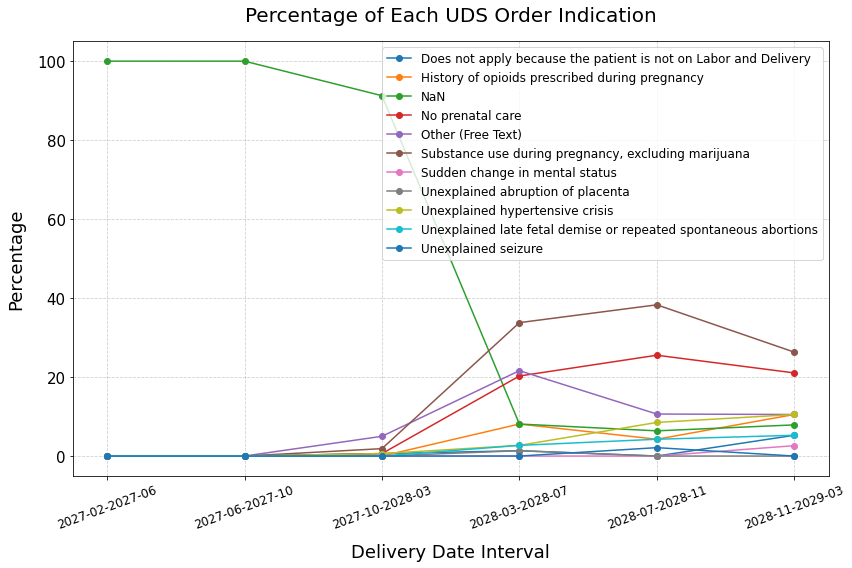

In [352]:
data_with_uds_order = data[data['uds_order_id'].notna()].copy()
data_without_uds_order = data[data['uds_order_id'].isna()].copy()

n_bins = 6
min_date = data['delivery_date'].min()
max_date = data['delivery_date'].max()
bin_edges = pd.date_range(start=min_date, end=max_date, periods=n_bins + 1)

data_with_uds_order['order_indication_filled'] = data_with_uds_order['order_indication'].fillna('NaN')

binned_data = pd.cut(data_with_uds_order['delivery_date'], bins=bin_edges)
uds_order_indication_time_counts = data_with_uds_order.groupby([binned_data, 'order_indication_filled']).size().unstack(fill_value=0)

uds_order_indication_percentages = uds_order_indication_time_counts.divide(uds_order_indication_time_counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 8))
time_labels = [f'{start.strftime("%Y-%m")}-{end.strftime("%Y-%m")}' for start, end in zip(bin_edges[:-1], bin_edges[1:])]

for indication in uds_order_indication_percentages.columns:
    plt.plot(time_labels, uds_order_indication_percentages[indication], label=indication, marker='o')

plt.title('Percentage of Each UDS Order Indication', fontsize=20, pad=20)
plt.xlabel('Delivery Date Interval', fontsize=18, labelpad=12)
plt.ylabel('Percentage', fontsize=18, labelpad=12)
plt.xticks(rotation=20, fontsize = 12)
plt.yticks(size=15)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='', loc='upper right', fontsize = 12)
plt.tight_layout()

plt.show()


<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>
<body>
  <ul>
    <li style="font-size: 18px;">The percentage of UDS order indications being NaN sharply decreases around late 2027. Other order indications increase during this period, namely: substance use during pregnancy (excluding marijuana), lack of prenatal care, and "Other."</li>
      <li style="font-size: 18px;">This aligns with the quality improvement initiative that the website mentions, which including revising the labor and delivery policies to prohibit ordering UDS for an indicaiton of IMU. However, we see here that there is no order indication of isolated marijuana use (IMU).</li>
  </ul>
</body>
</html>



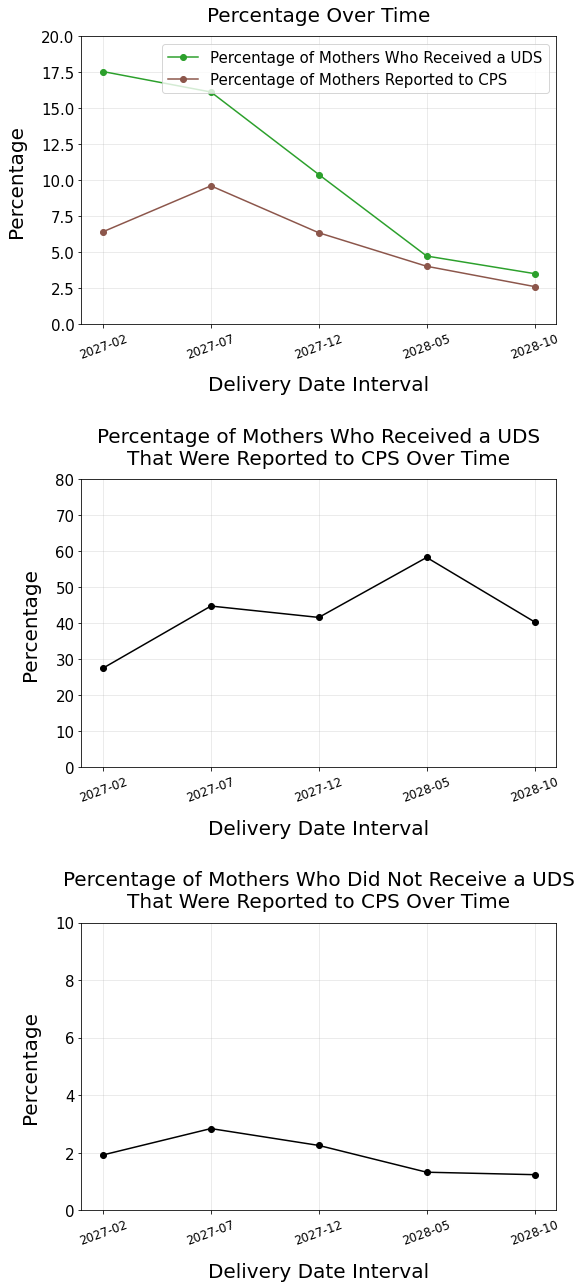

In [354]:
n_bins = 5
min_date = data_with_uds_order['delivery_date'].min()
max_date = data_with_uds_order['delivery_date'].max()
bin_edges_with_uds = pd.date_range(start=min_date, end=max_date, periods=n_bins + 1)

bins_with_uds = pd.cut(data_with_uds_order['delivery_date'], bins=bin_edges_with_uds)

min_date = data_without_uds_order['delivery_date'].min()
max_date = data_without_uds_order['delivery_date'].max()
bin_edges_without_uds = pd.date_range(start=min_date, end=max_date, periods=n_bins + 1)

bins_without_uds = pd.cut(data_without_uds_order['delivery_date'], bins=bin_edges_without_uds)

def calculate_percent_of_mothers_with_uds_orders(df, bins):
    percentage_non_nan = df.groupby(bins)['cps_reporting_date'].apply(lambda x: 100 - x.isna().mean() * 100).rename_axis('delivery_date_bin')
    labels = [label.left.strftime('%Y-%m') for label in percentage_non_nan.index.categories]
    return percentage_non_nan, labels

percentage_with_uds, labels_with_uds = calculate_percent_of_mothers_with_uds_orders(data_with_uds_order, bins_with_uds)
percentage_without_uds, labels_without_uds = calculate_percent_of_mothers_with_uds_orders(data_without_uds_order, bins_without_uds)

n_bins = 5
min_date = data['delivery_date'].min()
max_date = data['delivery_date'].max()
bin_edges = pd.date_range(start=min_date, end=max_date, periods=n_bins + 1)

bins = pd.cut(data['delivery_date'], bins=bin_edges)

def calculate_percent_of_mothers_with_uds_orders(df, bin_edges, column):
    percentage_non_nan = df.groupby(bins)[column].apply(lambda x: 100 - x.isna().mean() * 100).rename_axis('delivery_date_bin')
    
    labels = [label.left.strftime('%Y-%m') for label in percentage_non_nan.index.categories]
    
    return percentage_non_nan, labels

uds_percentage_non_nan, uds_labels = calculate_percent_of_mothers_with_uds_orders(data, bin_edges, 'uds_order_id')

cps_percentage_non_nan, cps_labels = calculate_percent_of_mothers_with_uds_orders(data, bin_edges, 'cps_reporting_date')

plt.figure(figsize=(8, 18))

plt.subplot(3, 1, 1)
plt.plot(uds_labels, uds_percentage_non_nan.values, color='C2', marker='o', linestyle='-', linewidth=1.5, label='Percentage of Mothers Who Received a UDS')
plt.plot(cps_labels, cps_percentage_non_nan.values, color='C5', marker='o', linestyle='-', linewidth=1.5, label='Percentage of Mothers Reported to CPS')
plt.title('Percentage Over Time', fontsize=20, pad=15)
plt.xlabel('Delivery Date Interval\n', fontsize=20, labelpad=15)
plt.ylabel('Percentage', fontsize=20, labelpad=15)
plt.xticks(rotation=20, fontsize=12)
plt.yticks(fontsize=15)
plt.ylim([0, 20])
plt.legend(fontsize=15, loc='upper right')
plt.grid(True, alpha=0.3)

plt.subplot(3, 1, 2)
plt.plot(labels_with_uds, percentage_with_uds.values, color='black', marker='o', linestyle='-', linewidth=1.5)
plt.title('Percentage of Mothers Who Received a UDS\nThat Were Reported to CPS Over Time', fontsize=20, pad=15)
plt.xlabel('Delivery Date Interval\n', fontsize=20, labelpad=15)
plt.ylabel('Percentage', fontsize=20, labelpad=15)
plt.tick_params(axis='x', rotation=20, labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.yticks(fontsize=15)
plt.ylim([0, 80])
plt.grid(True, alpha=0.3)

plt.subplot(3, 1, 3)
plt.plot(labels_without_uds, percentage_without_uds.values, color='black', marker='o', linestyle='-', linewidth=1.5)
plt.title('Percentage of Mothers Who Did Not Receive a UDS\nThat Were Reported to CPS Over Time', fontsize=20, pad=15)
plt.xlabel('Delivery Date Interval', fontsize=20, labelpad=15)
plt.ylabel('Percentage', fontsize=20, labelpad=15)
plt.tick_params(axis='x', rotation=20, labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.yticks(fontsize=15)
plt.ylim([0, 10])
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>
<body>
  <ul>
    <li style="font-size: 18px;">Overall, both the percentage of mothers who received a UDS and the percentage of mothers reported to CPS decrease significantly over time. This is likely due to the earlier observed drastic decrease in "NaN" indications, indicating the implementation of more specific UDS order requirements.</li>
    <li style="font-size: 18px;">The percentage of mothers who received a UDS and were reported to CPS over time seems to have increased slightly. This indicates that UDS orders are gaining significance; in other words, more UDS orders are proving practical and leading to action being taken, such as being reported to CPS</li>
  </ul>
</body>
</html>


In [355]:
def add_detected_sum_column(df):
    # Extract columns containing the word 'detected'
    detected_columns = df.filter(like='detected').columns

    # Replace NaN values with zeros
    df[detected_columns] = df[detected_columns].fillna(0)

    # Sum up the values of columns containing the word 'detected' for each row
    df['detected_sum'] = df[detected_columns].sum(axis=1)

    return df

In [356]:
data = add_detected_sum_column(data)

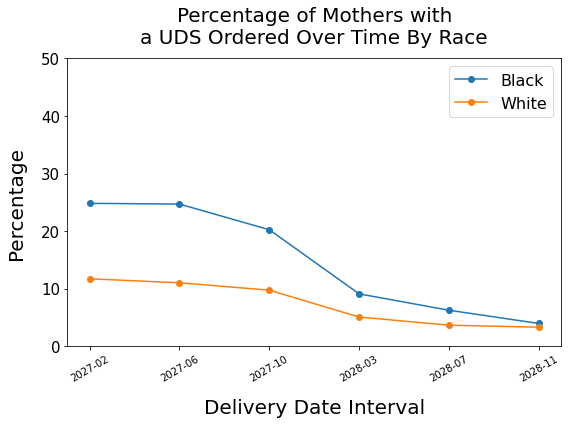

In [357]:
n_bins = 6

min_date = data['delivery_date'].min()
max_date = data['delivery_date'].max()

bin_edges = pd.date_range(start=min_date, end=max_date, periods=n_bins + 1)

bins = pd.cut(data['delivery_date'], bins=bin_edges)

def calculcate_percent_of_mothers_with_uds_orders(df, race, bin_edges):
    filtered_df = df[df['maternal_race'].str.contains(race, case=False, na=False)]

    percentage_non_nan = filtered_df.groupby(bins).apply(lambda x: 100 - x['uds_order_id'].isna().mean() * 100).rename_axis('delivery_date_bin')
    
    labels = [label.left.strftime('%Y-%m') for label in percentage_non_nan.index.categories]
    
    return percentage_non_nan, labels

percentage_non_nan_black, labels_black = calculcate_percent_of_mothers_with_uds_orders(data, 'Black', bin_edges)
percentage_non_nan_white, labels_white = calculcate_percent_of_mothers_with_uds_orders(data, 'White', bin_edges)

plt.figure(figsize=(8, 6))
plt.plot(labels_black, percentage_non_nan_black.values, label='Black', marker='o', linestyle='-', linewidth=1.5)
plt.plot(labels_white, percentage_non_nan_white.values, label='White', marker='o', linestyle='-', linewidth=1.5)
plt.title('Percentage of Mothers with\na UDS Ordered Over Time By Race', fontsize=20, pad = 15)
plt.xlabel('Delivery Date Interval', fontsize=20, labelpad=15)
plt.ylabel('Percentage', fontsize=20, labelpad = 15)
plt.legend(fontsize = 16)
plt.xticks(rotation=30)
plt.yticks(fontsize=15) 
plt.ylim([0, 50])
plt.tight_layout()
plt.show()


<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>
<body>
  <ul>
    <li style="font-size: 18px;">Initially the percentage of UDS orders for Black mothers was significantly higher than for White mothers, but it has become comparable over time.</li>
    <li style="font-size: 18px;"><em>Why was the percentage originally higher and what has made it change over time?</em></li>
  </ul>
</body>
</html>


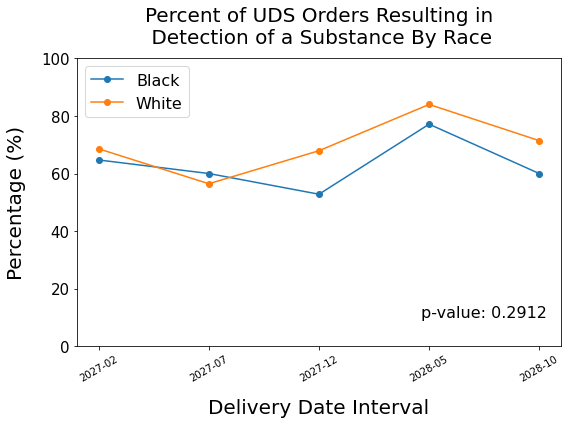

In [378]:
data_with_uds_order = data[data['uds_order_id'].notna()].copy()

data_with_uds_order['positive_for_any_substance'] = data_with_uds_order['detected_sum'] > 0
n_bins = 5 
min_date = data['delivery_date'].min()
max_date = data['delivery_date'].max()
bin_edges = pd.date_range(start=min_date, end=max_date, periods=n_bins + 1)

data_with_uds_order['delivery_date_bin'] = pd.cut(data_with_uds_order['delivery_date'], bins=bin_edges)

def percentage_positive_for_any_substance_over_time_custom_bins(df, race, bin_edges):
    filtered_df = df[df['maternal_race'].str.contains(race, case=False, na=False)]
    
    percentage_positive_for_any_substance = filtered_df.groupby('delivery_date_bin')['positive_for_any_substance'].mean() * 100
    
    labels = [label.left.strftime('%Y-%m') for label in percentage_positive_for_any_substance.index.categories]
    
    return percentage_positive_for_any_substance, labels

percentage_positive_for_any_substance_black, labels_black = percentage_positive_for_any_substance_over_time_custom_bins(data_with_uds_order, 'Black', bin_edges)
percentage_positive_for_any_substance_white, labels_white = percentage_positive_for_any_substance_over_time_custom_bins(data_with_uds_order, 'White', bin_edges)

t_stat, p_value = stats.ttest_ind(percentage_positive_for_any_substance_black.values, percentage_positive_for_any_substance_white.values)

plt.figure(figsize=(8, 6))
plt.plot(labels_black, percentage_positive_for_any_substance_black.values, label='Black', marker='o', linestyle='-', linewidth=1.5)
plt.plot(labels_white, percentage_positive_for_any_substance_white.values, label='White', marker='o', linestyle='-', linewidth=1.5)
plt.title('Percent of UDS Orders Resulting in\n Detection of a Substance By Race', fontsize=20, pad = 15)
plt.xlabel('Delivery Date Interval', fontsize=20, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=20, labelpad=15)
plt.xticks(rotation=30)
plt.yticks(fontsize=15)
plt.legend(fontsize=16)
plt.ylim([0, 100])

x_pos = 0.7 * len(labels_black)
y_pos = 10 
plt.text(x_pos, y_pos, f'p-value: {p_value:.4f}', fontsize=16, ha='center')

plt.tight_layout()
plt.show()


<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>
<body>
  <ul>
    <li style="font-size: 18px;">The initially higher percentage of UDS orders for Black mothers (from above) can be justified if the rate of UDS orders resulting in substance detection is comparable between White and Black mothers during this time, indicating consistent proportions of positive results among the two groups.</li>
      <li style="font-size: 18px;">At first glance, the process does appear fair, with similar detection rates for UDS orders among Black and White mothers.</li>
  </ul>
</body>
</html>

In [359]:
data_with_uds_order['positive_not_exclusively_thc'] = data_with_uds_order['detected_sum'] - data_with_uds_order['detected_tetrahydrocannabinol'] > 0
data_with_uds_order['positive_exclusively_thc'] = (data_with_uds_order['detected_tetrahydrocannabinol'] == 1) & (data_with_uds_order['detected_sum'] == 1)

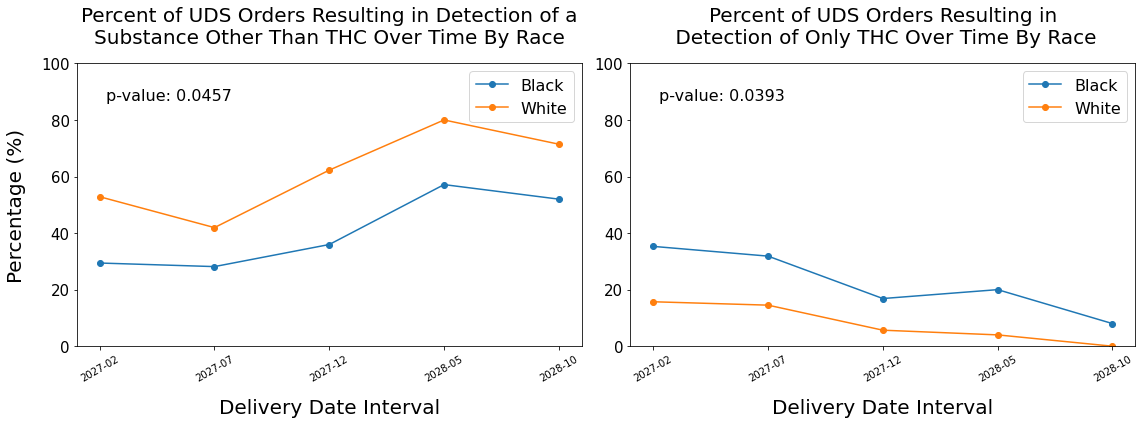

In [360]:
n_bins = 5  
min_date = data['delivery_date'].min()
max_date = data['delivery_date'].max()
bin_edges = pd.date_range(start=min_date, end=max_date, periods=n_bins + 1)

# Bin 'delivery_date' using the generated bin_edges
data_with_uds_order['delivery_date_bin'] = pd.cut(data_with_uds_order['delivery_date'], bins=bin_edges)

# Function to calculate the percentage of positive THC results over time for a given race
def percentage_positive_not_exclusively_thc_over_time(df, race, bin_edges):
    
    # Filter based on 'maternal_race'
    filtered_df = df[df['maternal_race'].str.contains(race, case=False, na=False)]
    
    # Calculate the mean percentage of positive THC results for each bin
    percentage_positive_not_exclusively_thc = filtered_df.groupby('delivery_date_bin')['positive_not_exclusively_thc'].mean() * 100
    
    # Extract bin labels as the left edge of each bin interval
    labels = [label.left.strftime('%Y-%m') for label in percentage_positive_not_exclusively_thc.index.categories]
    
    return percentage_positive_not_exclusively_thc, labels

percentage_positive_not_exclusively_thc_black, labels_black = percentage_positive_not_exclusively_thc_over_time(data_with_uds_order, 'Black', bin_edges)
percentage_positive_not_exclusively_thc_white, labels_white = percentage_positive_not_exclusively_thc_over_time(data_with_uds_order, 'White', bin_edges)

t_stat, p_value1 = stats.ttest_ind(percentage_positive_not_exclusively_thc_black.values, percentage_positive_not_exclusively_thc_white.values)

# Function to calculate the percentage of positive THC results over time for a given race
def percentage_positive_exclusively_thc_over_time(df, race, bin_edges):
    # Filter based on 'maternal_race'
    filtered_df = df[df['maternal_race'].str.contains(race, case=False, na=False)]
    
    # Calculate the mean percentage of positive THC results for each bin
    percentage_positive_exclusively_thc = filtered_df.groupby('delivery_date_bin')['positive_exclusively_thc'].mean() * 100
    
    # Extract bin labels as the left edge of each bin interval
    labels = [label.left.strftime('%Y-%m') for label in percentage_positive_exclusively_thc.index.categories]
    
    return percentage_positive_exclusively_thc, labels

# Calculate for both Black and White races
percentage_positive_exclusively_thc_black, labels_black = percentage_positive_exclusively_thc_over_time(data_with_uds_order, 'Black', bin_edges)
percentage_positive_exclusively_thc_white, labels_white = percentage_positive_exclusively_thc_over_time(data_with_uds_order, 'White', bin_edges)

# Sample data preparation and statistical test
# Assuming 'percentage_positive_exclusively_thc_black.values' and 'percentage_positive_exclusively_thc_white.values' are numpy arrays
t_stat, p_value2 = stats.ttest_ind(percentage_positive_exclusively_thc_black.values, percentage_positive_exclusively_thc_white.values)

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot for positive_not_exclusively_thc
axs[0].plot(labels_black, percentage_positive_not_exclusively_thc_black.values, label='Black', marker='o', linestyle='-', linewidth=1.5)
axs[0].plot(labels_white, percentage_positive_not_exclusively_thc_white.values, label='White', marker='o', linestyle='-', linewidth=1.5)
axs[0].set_title('Percent of UDS Orders Resulting in Detection of a\nSubstance Other Than THC Over Time By Race', fontsize=20, pad = 20)
axs[0].set_xlabel('Delivery Date Interval', fontsize=20, labelpad=15)
axs[0].set_ylabel('Percentage (%)', fontsize=20, labelpad=15)
axs[0].tick_params(axis='x', rotation=30)
axs[0].tick_params(axis='y', labelsize=15)
axs[0].legend(fontsize=16)
axs[0].set_ylim([0, 100])

# Displaying the p-value on the plot
x_pos = 0.12 * len(labels_black) 
y_pos = 87
axs[0].text(x_pos, y_pos, f'p-value: {p_value1:.4f}', fontsize=16, ha='center')

# Plot for positive_exclusively_thc
axs[1].plot(labels_black, percentage_positive_exclusively_thc_black.values, label='Black', marker='o', linestyle='-', linewidth=1.5)
axs[1].plot(labels_white, percentage_positive_exclusively_thc_white.values, label='White', marker='o', linestyle='-', linewidth=1.5)
axs[1].set_title('Percent of UDS Orders Resulting in\n Detection of Only THC Over Time By Race', fontsize=20, pad = 20)
axs[1].set_xlabel('Delivery Date Interval', fontsize=20, labelpad=15)
#axs[1].set_ylabel('Percentage (%)', fontsize=20, labelpad=15)
axs[1].tick_params(axis='x', rotation=30)
axs[1].tick_params(axis='y', labelsize=15)
axs[1].legend(fontsize=16)
axs[1].set_ylim([0, 100])


x_pos = 0.12 * len(labels_black) 
y_pos = 87
axs[1].text(x_pos, y_pos, f'p-value: {p_value2:.4f}', fontsize=16, ha='center')

plt.tight_layout()
plt.show()

<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>
<body>
  <ul>
    <li style="font-size: 18px;">When separating the plot into exclusive THC detection and detection of substances other than THC, a disparity emerges.</li>
      <li style="font-size: 18px;">White mothers ordered a UDS are more likely to test positive for a non-THC substance compared to Black mothers. Conversely, Black mothers ordered a UDS are more likely to test positive for THC than White mothers..</li>
      <li style="font-size: 18px;">The trends we see in these plots are promising, though. We can see that the percentage of UDS orders resulting in detection of THC is decreasing for both White and Black mothers, meaning that UDS orders seem to be ordered when there is actually suspicion of a substance that is not THC. Similarly, the percentage of orders that result in detection of a substance other than THC is increasing, which supports this point.</li>
</ul>
</body>
</html>

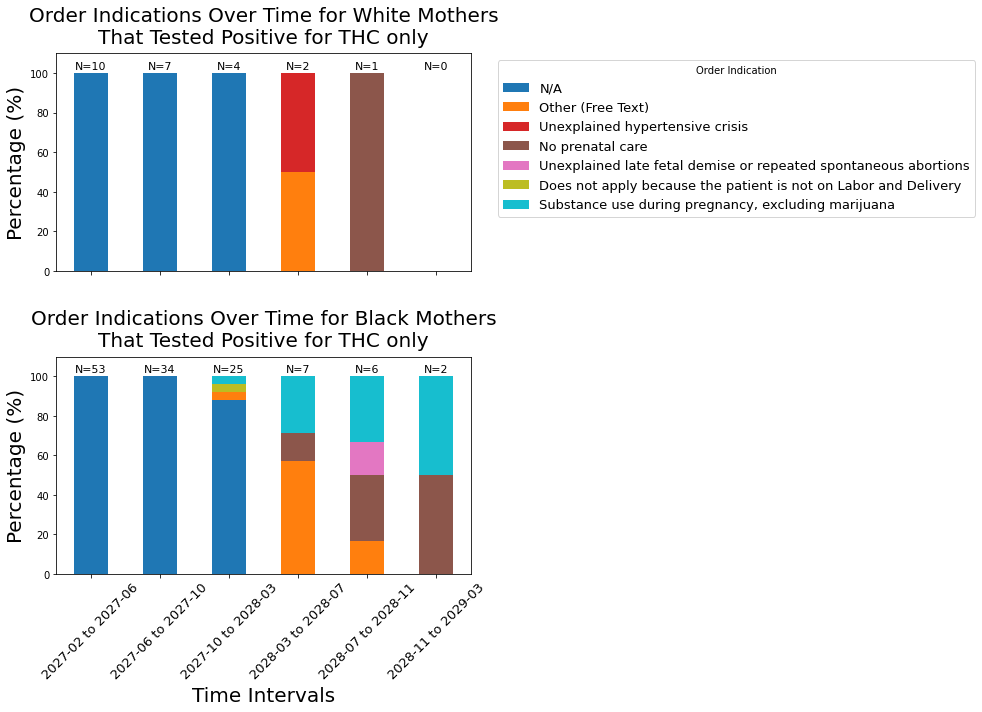

In [361]:
positive_exclusive_thc_white = data_with_uds_order[(data_with_uds_order['detected_tetrahydrocannabinol'] == 1) & 
                                           (data_with_uds_order['detected_sum'] == 1) & 
                                           (data_with_uds_order['maternal_race'].str.contains('white', case=False))]

positive_exclusive_thc_black = data_with_uds_order[(data_with_uds_order['detected_tetrahydrocannabinol'] == 1) & 
                                           (data_with_uds_order['detected_sum'] == 1) & 
                                           (data_with_uds_order['maternal_race'].str.contains('black', case=False))]

positive_exclusive_thc_white['order_indication'] = positive_exclusive_thc_white['order_indication'].fillna('N/A')
positive_exclusive_thc_black['order_indication'] = positive_exclusive_thc_black['order_indication'].fillna('N/A')

order_indication_counts_white = (positive_exclusive_thc_white['order_indication'].value_counts(normalize=True) * 100).round(2)  # Convert to percentage and round to 2 decimal places
order_indication_counts_black = (positive_exclusive_thc_black['order_indication'].value_counts(normalize=True) * 100).round(2)

# Combine the datasets temporarily to standardize the order_indication categories
combined_data = pd.concat([positive_exclusive_thc_white, positive_exclusive_thc_black])
combined_data['order_indication'] = combined_data['order_indication'].fillna('N/A')
all_indications = combined_data['order_indication'].unique()

# Ensure both datasets have the same 'order_indication' categories
positive_exclusive_thc_white = positive_exclusive_thc_white.assign(order_indication=positive_exclusive_thc_white['order_indication'].astype(pd.CategoricalDtype(categories=all_indications, ordered=True)))
positive_exclusive_thc_black = positive_exclusive_thc_black.assign(order_indication=positive_exclusive_thc_black['order_indication'].astype(pd.CategoricalDtype(categories=all_indications, ordered=True)))

n_bins = 6
min_date = data_with_uds_order['delivery_date'].min()
max_date = data_with_uds_order['delivery_date'].max()
bin_edges = pd.date_range(start=min_date, end=max_date, periods=n_bins + 1)

def process_data_for_order_indications_over_time_with_counts(df, bin_edges):
    df['time_bin'] = pd.cut(df['delivery_date'], bins=bin_edges, labels=[f'{bin_edges[i].strftime("%Y-%m")} to {bin_edges[i+1].strftime("%Y-%m")}' for i in range(len(bin_edges)-1)])
    counts = df.groupby(['time_bin', 'order_indication']).size().unstack(fill_value=0)
    percentages = counts.divide(counts.sum(axis=1), axis=0) * 100
    return percentages, counts.sum(axis=1)

# Calculate percentages and total counts
percentages_white, counts_white = process_data_for_order_indications_over_time_with_counts(positive_exclusive_thc_white, bin_edges)
percentages_black, counts_black = process_data_for_order_indications_over_time_with_counts(positive_exclusive_thc_black, bin_edges)

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True, sharey=True)

# Plot for White mothers
percentages_white.plot(ax=axs[0], kind='bar', stacked=True, colormap='tab10')
axs[0].set_title('Order Indications Over Time for White Mothers\nThat Tested Positive for THC only', fontsize = 20, pad = 10)
axs[0].set_ylabel('Percentage (%)', fontsize = 20)
axs[0].legend(title='Order Indication', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 13)

# Plot for Black mothers
percentages_black.plot(ax=axs[1], kind='bar', stacked=True, colormap='tab10')
axs[1].set_title('\nOrder Indications Over Time for Black Mothers\nThat Tested Positive for THC only', fontsize = 20, pad = 10)
axs[1].set_xlabel('Time Intervals', fontsize = 20)
axs[1].set_ylabel('Percentage (%)', fontsize = 20)
axs[1].legend().set_visible(False)  # Hide legend to avoid repetition

# Function to add count annotations
def annotate_counts(ax, counts):
    for i, count in enumerate(counts):
        ax.text(i, 106, f'N={count}', ha='center', va='top', fontsize=11)

# Add count annotations
annotate_counts(axs[0], counts_white)
annotate_counts(axs[1], counts_black)

# Set the tick labels for x-axis based on the bin edges
time_labels = [f'{bin_edges[i].strftime("%Y-%m")} to {bin_edges[i+1].strftime("%Y-%m")}' for i in range(n_bins)]
plt.xticks(ticks=np.arange(n_bins), labels=time_labels, rotation=45, fontsize = 13)
plt.ylim([0, 110])

plt.tight_layout()
plt.show()

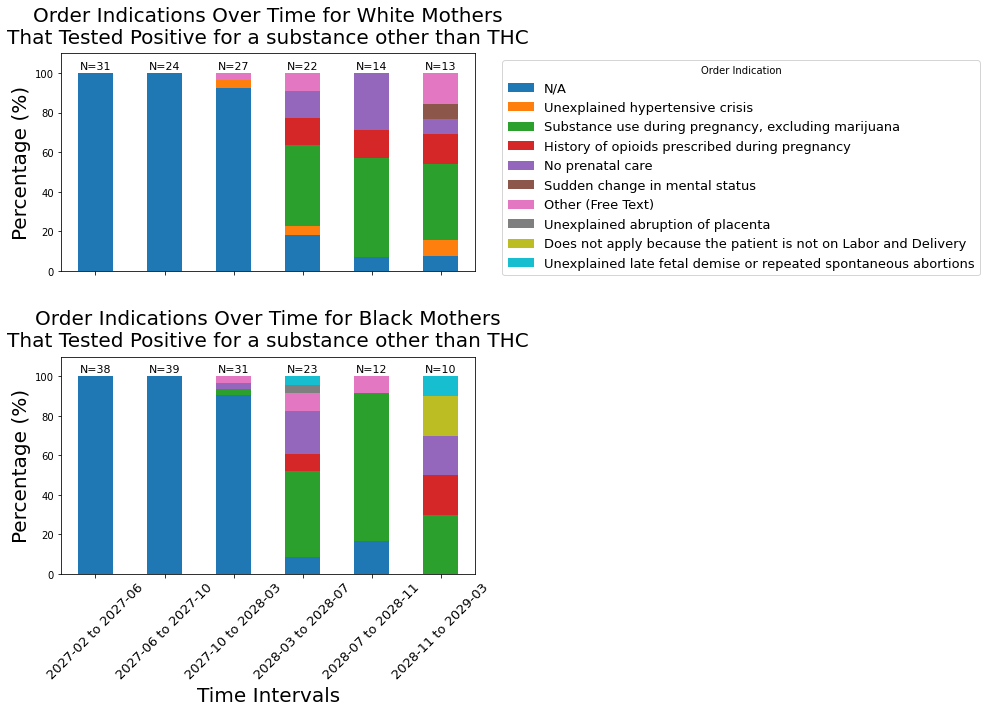

In [362]:
data_with_uds_order['is_positive_non_thc'] = ((data_with_uds_order['detected_sum'] > 0) & (data_with_uds_order['detected_tetrahydrocannabinol'] == 0)) | ((data_with_uds_order['detected_tetrahydrocannabinol'] == 1) & (data_with_uds_order['detected_sum'] > 1))

positive_not_exclusive_thc_white = data_with_uds_order[(data_with_uds_order['is_positive_non_thc']) & (data_with_uds_order['maternal_race'].str.contains('white', case=False))]
positive_not_exclusive_thc_black = data_with_uds_order[(data_with_uds_order['is_positive_non_thc']) & (data_with_uds_order['maternal_race'].str.contains('black', case=False))]


positive_not_exclusive_thc_white['order_indication'] = positive_not_exclusive_thc_white['order_indication'].fillna('N/A')
positive_not_exclusive_thc_black['order_indication'] = positive_not_exclusive_thc_black['order_indication'].fillna('N/A')

positive_not_exclusive_thc_white['order_indication'] = positive_not_exclusive_thc_white['order_indication'].fillna('N/A')
positive_not_exclusive_thc_black['order_indication'] = positive_not_exclusive_thc_black['order_indication'].fillna('N/A')

order_indication_counts_white = (positive_not_exclusive_thc_white['order_indication'].value_counts(normalize=True) * 100).round(2)  # Convert to percentage and round to 2 decimal places
order_indication_counts_black = (positive_not_exclusive_thc_black['order_indication'].value_counts(normalize=True) * 100).round(2)

# Combine the datasets temporarily to standardize the order_indication categories
combined_data = pd.concat([positive_not_exclusive_thc_white, positive_not_exclusive_thc_black])
combined_data['order_indication'] = combined_data['order_indication'].fillna('N/A')
all_indications = combined_data['order_indication'].unique()


# Ensure both datasets have the same 'order_indication' categories
positive_not_exclusive_thc_white = positive_not_exclusive_thc_white.assign(order_indication=positive_not_exclusive_thc_white['order_indication'].astype(pd.CategoricalDtype(categories=all_indications, ordered=True)))
positive_not_exclusive_thc_black = positive_not_exclusive_thc_black.assign(order_indication=positive_not_exclusive_thc_black['order_indication'].astype(pd.CategoricalDtype(categories=all_indications, ordered=True)))

n_bins = 6
min_date = data_with_uds_order['delivery_date'].min()
max_date = data_with_uds_order['delivery_date'].max()
bin_edges = pd.date_range(start=min_date, end=max_date, periods=n_bins + 1)

def process_data_for_order_indications_over_time_with_counts(df, bin_edges):
    df['time_bin'] = pd.cut(df['delivery_date'], bins=bin_edges, labels=[f'{bin_edges[i].strftime("%Y-%m")} to {bin_edges[i+1].strftime("%Y-%m")}' for i in range(len(bin_edges)-1)])
    counts = df.groupby(['time_bin', 'order_indication']).size().unstack(fill_value=0)
    percentages = counts.divide(counts.sum(axis=1), axis=0) * 100
    return percentages, counts.sum(axis=1)

# Calculate percentages and total counts
percentages_white, counts_white = process_data_for_order_indications_over_time_with_counts(positive_not_exclusive_thc_white, bin_edges)
percentages_black, counts_black = process_data_for_order_indications_over_time_with_counts(positive_not_exclusive_thc_black, bin_edges)

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True, sharey=True)

# Plot for White mothers
percentages_white.plot(ax=axs[0], kind='bar', stacked=True, colormap='tab10')
axs[0].set_title('Order Indications Over Time for White Mothers\nThat Tested Positive for a substance other than THC', fontsize = 20, pad = 10)
axs[0].set_ylabel('Percentage (%)', fontsize = 20)
axs[0].legend(title='Order Indication', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 13)

# Plot for Black mothers
percentages_black.plot(ax=axs[1], kind='bar', stacked=True, colormap='tab10')
axs[1].set_title('\nOrder Indications Over Time for Black Mothers\nThat Tested Positive for a substance other than THC', fontsize = 20, pad = 10)
axs[1].set_xlabel('Time Intervals', fontsize = 20)
axs[1].set_ylabel('Percentage (%)', fontsize = 20)
axs[1].legend().set_visible(False)  # Hide legend to avoid repetition

# Function to add count annotations
def annotate_counts(ax, counts):
    for i, count in enumerate(counts):
        ax.text(i, 106, f'N={count}', ha='center', va='top', fontsize=11)

# Add count annotations
annotate_counts(axs[0], counts_white)
annotate_counts(axs[1], counts_black)

# Set the tick labels for x-axis based on the bin edges
time_labels = [f'{bin_edges[i].strftime("%Y-%m")} to {bin_edges[i+1].strftime("%Y-%m")}' for i in range(n_bins)]
plt.xticks(ticks=np.arange(n_bins), labels=time_labels, rotation=45, fontsize = 13)
plt.ylim([0, 110])


plt.tight_layout()
plt.show()


<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>
<body>
  <ul>
    <li style="font-size: 18px;">Overall, there doesn't appear to be any observable differencse between White and Black mothers regarding Order Indications that resulted in positivity of a substance, whether exclusively THC or not.</li>
  </ul>
</body>
</html>


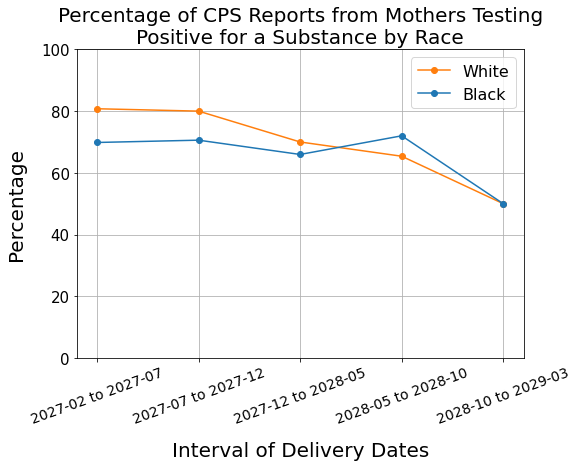

In [363]:
cps_reported = data[~data['cps_reporting_date'].isna()]

cps_reported_black = cps_reported[cps_reported['maternal_race'].str.contains('Black')]
cps_reported_white = cps_reported[cps_reported['maternal_race'].str.contains('White')]

# Bin the delivery_date into specified number of bins
bins = pd.cut(cps_reported['delivery_date'], bins=5)

# Group by bins and calculate percentages for white dataset
percentages_over_time_white = (cps_reported_white.groupby(bins)
                               .apply(lambda x: (x['detected_sum'] > 0).mean() * 100)
                               .reset_index(name='percentage'))

# Group by bins and calculate percentages for black dataset
percentages_over_time_black = (cps_reported_black.groupby(bins)
                               .apply(lambda x: (x['detected_sum'] > 0).mean() * 100)
                               .reset_index(name='percentage'))

# Extract start and end dates from the intervals for white dataset
percentages_over_time_white['start_date'] = percentages_over_time_white['delivery_date'].apply(lambda x: x.left)
percentages_over_time_white['end_date'] = percentages_over_time_white['delivery_date'].apply(lambda x: x.right)

# Convert start and end dates to strings with year and month only for white dataset
percentages_over_time_white['delivery_date'] = percentages_over_time_white.apply(lambda row: f"{row['start_date'].strftime('%Y-%m')} to {row['end_date'].strftime('%Y-%m')}" if pd.notnull(row['end_date']) else f"{row['start_date'].strftime('%Y-%m')}", axis=1)

# Plotting
plt.figure(figsize=(8, 6))

# Plot white data
plt.plot(percentages_over_time_white['delivery_date'], percentages_over_time_white['percentage'], color = 'C1', marker='o', linestyle='-', label='White')

# Plot black data
plt.plot(percentages_over_time_white['delivery_date'], percentages_over_time_black['percentage'], color = 'C0', marker='o', linestyle='-', label='Black')

plt.xlabel('Interval of Delivery Dates', fontsize=20, labelpad=15)  # Adjust font size and labelpad here
plt.ylabel('Percentage', fontsize=20, labelpad=15)  # Adjust font size and labelpad here
plt.xticks(rotation=20, fontsize=14)  # Adjust font size and rotation of xticks here
plt.yticks(fontsize=15)  # Adjust font size of yticks here
plt.grid(True)
plt.tight_layout()
plt.ylim([0, 100])  # Adjust y-axis limit as needed
plt.legend(fontsize=16)
plt.title('Percentage of CPS Reports from Mothers Testing\nPositive for a Substance by Race', fontsize=20)  # Adjust font size here
plt.show()


<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>
<body>
  <ul>
    <li style="font-size: 18px;">If we look at the percentage of CPS reports from mothers testing positive for a substance by race (any substance), it is approximately the same between White and Black mothers.</li>
  </ul>
</body>
</html>


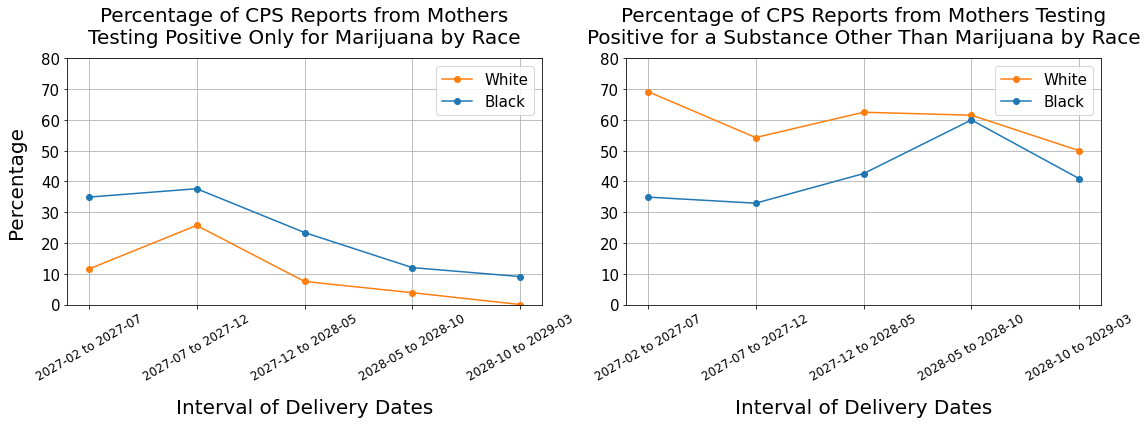

In [364]:
# Bin the delivery_date into specified number of bins
bins = pd.cut(cps_reported['delivery_date'], bins=5)

# Function to calculate percentages and format date intervals
def calculate_and_format(cps_data, condition):
    percentages = cps_data.groupby(bins).apply(lambda x: condition(x).mean() * 100).reset_index(name='percentage')
    percentages['start_date'] = percentages['delivery_date'].apply(lambda x: x.left)
    percentages['end_date'] = percentages['delivery_date'].apply(lambda x: x.right)
    percentages['delivery_date'] = percentages.apply(lambda row: f"{row['start_date'].strftime('%Y-%m')} to {row['end_date'].strftime('%Y-%m')}", axis=1)
    return percentages

# THC only condition
condition_thc_only = lambda x: (x['detected_tetrahydrocannabinol'] == 1) & (x['detected_sum'] == 1)
percentages_over_time_white_thc = calculate_and_format(cps_reported_white, condition_thc_only)
percentages_over_time_black_thc = calculate_and_format(cps_reported_black, condition_thc_only)

# Non-THC condition
condition_non_thc = lambda x: (x['detected_sum'] - x['detected_tetrahydrocannabinol']) > 0
percentages_over_time_white_non_thc = calculate_and_format(cps_reported_white, condition_non_thc)
percentages_over_time_black_non_thc = calculate_and_format(cps_reported_black, condition_non_thc)

# Plotting in a 1x2 subplot layout
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# THC only plot
axs[0].plot(percentages_over_time_white_thc['delivery_date'], percentages_over_time_white_thc['percentage'], color='C1', marker='o', linestyle='-', label='White')
axs[0].plot(percentages_over_time_black_thc['delivery_date'], percentages_over_time_black_thc['percentage'], color='C0', marker='o', linestyle='-', label='Black')
axs[0].set_title('Percentage of CPS Reports from Mothers\nTesting Positive Only for Marijuana by Race', fontsize=20, pad = 15)
axs[0].set_xlabel('Interval of Delivery Dates', fontsize=20, labelpad = 15)
axs[0].set_ylabel('Percentage', fontsize=20, labelpad = 15)
axs[0].set_ylim([0, 80])
axs[0].legend(fontsize = 15)
axs[0].tick_params(axis='y', which='major', labelsize=15)
axs[0].tick_params(axis='x', labelsize=12, rotation = 30)
axs[0].grid(True)

# Non-THC plot
axs[1].plot(percentages_over_time_white_non_thc['delivery_date'], percentages_over_time_white_non_thc['percentage'], color='C1', marker='o', linestyle='-', label='White')
axs[1].plot(percentages_over_time_black_non_thc['delivery_date'], percentages_over_time_black_non_thc['percentage'], color='C0', marker='o', linestyle='-', label='Black')
axs[1].set_title('Percentage of CPS Reports from Mothers Testing\nPositive for a Substance Other Than Marijuana by Race', fontsize=20, pad = 15)
axs[1].set_xlabel('Interval of Delivery Dates', fontsize=20, labelpad = 15)
axs[1].set_ylabel('', fontsize=12)
axs[1].set_ylim([0, 80])
axs[1].legend(fontsize =15)
axs[1].grid(True)
axs[1].tick_params(axis='y', which='major', labelsize=15)
axs[1].tick_params(axis='x', labelsize=12, rotation = 30)

plt.tight_layout()
plt.show()

<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>
<body>
  <ul>
    <li style="font-size: 18px;">A higher percentage of CPS reports come from THC-only detection for Black mothers compared to White mothers. However, the trend is promising as it approaches zero. It reaches 0 for white mothers, but not quite for Black mothers. Ideally, this should reach 0 for both because a mother that tested positive only for marijuana should not be reported to CPS (barring exceptions).</li>
    <li style="font-size: 18px;">Likewise, a higher percentage of CPS reports stem from non-THC positivity for white mothers compared to black mothers, but this discrepancy diminishes over time.</li>
  </ul>
</body>
</html>


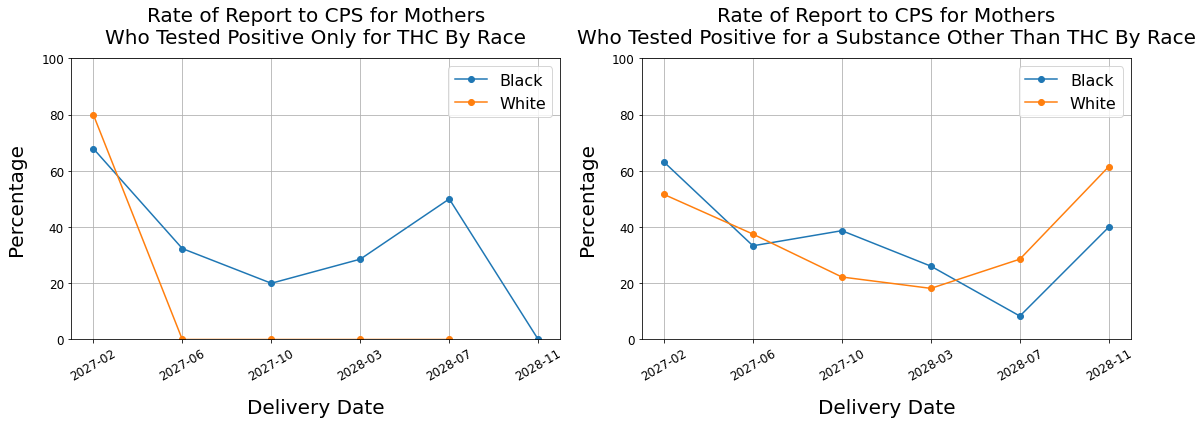

In [376]:
# Determine the bin edges based on the delivery_date range to cover the entire dataset period
n_bins = 6  # Adjust based on your preference
min_date = data_with_uds_order['delivery_date'].min()
max_date = data_with_uds_order['delivery_date'].max()
bin_edges = pd.date_range(start=min_date, end=max_date, periods=n_bins + 1)

# Bin 'delivery_date' using the generated bin_edges
bins = pd.cut(data_with_uds_order['delivery_date'], bins=bin_edges)
    
def calculate_order_indication_nan_percentage(df, race, bin_edges):
    filtered_df = df[df['maternal_race'].str.contains(race, case=False, na=False)]
    
    # Group by bins and calculate the percentage of 'order_indication' that is NaN
    order_indication_nan_percentage = filtered_df.groupby(bins)['cps_reporting_date'].apply(lambda x: x.isna().mean() * 100)  # Convert to percentage
    
    # Generate labels for bins (using the left edge of each bin)
    labels = [label.left.strftime('%Y-%m') for label in order_indication_nan_percentage.index.categories]
    
    return order_indication_nan_percentage, labels

# Calculate for both Black and White
order_indication_nan_percentage_black, labels_black = calculate_order_indication_nan_percentage(positive_exclusive_thc_black, 'Black', bin_edges)
order_indication_nan_percentage_white, labels_white = calculate_order_indication_nan_percentage(positive_exclusive_thc_white, 'White', bin_edges)

# Determine the bin edges based on the delivery_date range to cover the entire dataset period
n_bins = 6  # Adjust based on your preference
min_date = data_with_uds_order['delivery_date'].min()
max_date = data_with_uds_order['delivery_date'].max()
bin_edges = pd.date_range(start=min_date, end=max_date, periods=n_bins + 1)

# Bin 'delivery_date' using the generated bin_edges
bins = pd.cut(data_with_uds_order['delivery_date'], bins=bin_edges)
    
def calculate_order_indication_nan_percentage(df, race, bin_edges):
    filtered_df = df[df['maternal_race'].str.contains(race, case=False, na=False)]
    
    # Group by bins and calculate the percentage of 'order_indication' that is NaN
    order_indication_nan_percentage = filtered_df.groupby(bins)['cps_reporting_date'].apply(lambda x: x.isna().mean() * 100)  # Convert to percentage
    
    # Generate labels for bins (using the left edge of each bin)
    labels = [label.left.strftime('%Y-%m') for label in order_indication_nan_percentage.index.categories]
    
    return order_indication_nan_percentage, labels

# Calculate for both Black and White
order_indication_nan_percentage_black, labels_black = calculate_order_indication_nan_percentage(positive_not_exclusive_thc_black, 'Black', bin_edges)
order_indication_nan_percentage_white, labels_white = calculate_order_indication_nan_percentage(positive_not_exclusive_thc_white, 'White', bin_edges)

n_bins = 6  # Adjust based on your preference
min_date = data_with_uds_order['delivery_date'].min()
max_date = data_with_uds_order['delivery_date'].max()
bin_edges = pd.date_range(start=min_date, end=max_date, periods=n_bins + 1)

# Bin 'delivery_date' using the generated bin_edges
bins = pd.cut(data_with_uds_order['delivery_date'], bins=bin_edges)
    
def calculate_order_indication_nan_percentage(df, race, bin_edges):
    filtered_df = df[df['maternal_race'].str.contains(race, case=False, na=False)]
    
    # Group by bins and calculate the percentage of 'order_indication' that is NaN
    order_indication_nan_percentage = filtered_df.groupby(bins)['cps_reporting_date'].apply(lambda x: x.isna().mean() * 100)  # Convert to percentage
    
    # Generate labels for bins (using the left edge of each bin)
    labels = [label.left.strftime('%Y-%m') for label in order_indication_nan_percentage.index.categories]
    
    return order_indication_nan_percentage, labels

# Calculate for both Black and White
order_indication_nan_percentage_black, labels_black = calculate_order_indication_nan_percentage(positive_exclusive_thc_black, 'Black', bin_edges)
order_indication_nan_percentage_white, labels_white = calculate_order_indication_nan_percentage(positive_exclusive_thc_white, 'White', bin_edges)

# Plotting in a 1x2 subplot layout
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot for THC exclusive
axs[0].plot(labels_black, order_indication_nan_percentage_black.values, label='Black', color='C0', marker='o', linestyle='-', linewidth=1.5)
axs[0].plot(labels_white, order_indication_nan_percentage_white.values, label='White', color='C1', marker='o', linestyle='-', linewidth=1.5)
axs[0].set_title('Rate of Report to CPS for Mothers\nWho Tested Positive Only for THC By Race', fontsize=20, pad=15)
axs[0].set_xlabel('Delivery Date', fontsize=20, labelpad=15)
axs[0].set_ylabel('Percentage', fontsize=20, labelpad=15)
axs[0].legend(fontsize=16)
axs[0].tick_params(axis='x', rotation=30, labelsize=12)
axs[0].tick_params(axis='y', labelsize=12)
axs[0].set_ylim([0, 100])
axs[0].grid(True)

# Calculate for both Black and White (non-THC)
order_indication_nan_percentage_black, labels_black = calculate_order_indication_nan_percentage(positive_not_exclusive_thc_black, 'Black', bin_edges)
order_indication_nan_percentage_white, labels_white = calculate_order_indication_nan_percentage(positive_not_exclusive_thc_white, 'White', bin_edges)

# Plot for non-THC
axs[1].plot(labels_black, order_indication_nan_percentage_black.values, label='Black', color='C0', marker='o', linestyle='-', linewidth=1.5)
axs[1].plot(labels_white, order_indication_nan_percentage_white.values, label='White', color='C1', marker='o', linestyle='-', linewidth=1.5)
axs[1].set_title('Rate of Report to CPS for Mothers\nWho Tested Positive for a Substance Other Than THC By Race', fontsize=20, pad=15)
axs[1].set_xlabel('Delivery Date', fontsize=20, labelpad=15)
axs[1].set_ylabel('Percentage', fontsize=20, labelpad=15)
axs[1].legend(fontsize=16)
axs[1].tick_params(axis='x', rotation=30, labelsize=12)
axs[1].tick_params(axis='y', labelsize=12)
axs[1].set_ylim([0, 100])
axs[1].grid(True)

plt.tight_layout()
plt.show()




<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>
<body>
  <ul>
    <li style="font-size: 18px;">If we look now at the rate of report to CPS for mothers (previously we were looking at the percentage of CPS reports that come from different categories), we see that the rate of report to CPS for mothers who tested positive only for THC is higher for Black mothers compared to White mothers. However, it reaches 0 by the last data point, aligning with the rate for White mothers, which is a positive sign.</li>
    <li style="font-size: 18px;">The rate of report to CPS for mothers who tested positively for a substance besides THC doesn't seem to have any observable differences between White and Black mothers.</li>
  </ul>
</body>
</html>
